<a href="https://colab.research.google.com/github/xper100/Coursera/blob/main/n111a_eda_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 1*

---

# 📝 Assignment



## 1.데이터셋 불러오기 연습

다음 url에서 엑셀 파일을 불러오세요. (pandas excel)

<https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx>

  - 데이터셋 변수의 이름은 `df1`, `df2`로 저장하세요.
  - row가 아닌 column에 '매출액', '영업이익' 이 가도록 데이터를 transpose 하세요.
  - 이후 아래 링크를 참조하여 첫번째 row를 column name으로 설정하세요.

<https://stackoverflow.com/questions/31328861/python-pandas-replacing-header-with-top-row>

- 파일은 2개의 시트로 구성되어 있으며 각각 이름은 `008770`, `035250` 입니다.



In [1]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url_link = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx'

# Import excel file
df1 = pd.read_excel(url_link, sheet_name = '008770 ') 
df2 = pd.read_excel(url_link, sheet_name = '035250')

# Row names (Features)
df1_columns = df1.iloc[:,0]
df2_columns = df2.iloc[:,0]

# Transpose data and rename columns
df1 = df1.T.iloc[1:]
df2 = df2.T.iloc[1:]

df1.columns = df1_columns
df2.columns = df2_columns



## 2. 데이터 확인

- 데이터의 dimension을 확인하세요.
- 데이터의 결측치가 어디에 있는지 확인 후 0으로 대체하세요.
- 각 데이터 별로 **FCF**의 값을 barplot으로 시각화하세요.
  - 0보다 큰값, 작은값의 수의 총합을 `num1`, `num2`에 저장하세요


In [3]:
# Dimension of data
df1.shape
df2.shape
print(df1.shape, df2.shape)


(8, 32) (8, 32)


In [4]:
# Find out all missing Values and replace them into 0
df1.isnull().sum()
df1[df1.isnull()] = 0

df2.isnull().sum()
df2[df2.isnull()] = 0

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


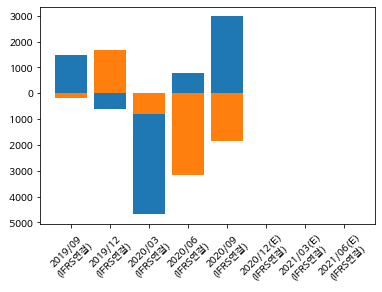

In [13]:
plt.rc('font', family='NanumBarunGothic') 

# Barplot, FCF
plt.bar(x = df1.index, height = df1['FCF'], label = 'df1')
plt.bar(x = df2.index, height = df2['FCF'], label = 'df2')
plt.xticks(rotation=45)

plt.show()

In [6]:
num1 = df1.FCF[df1['FCF'] > 0].value_counts().sum() + df2.FCF[df2['FCF'] > 0].value_counts().sum() 
num2 = df1.FCF[df1['FCF'] < 0].value_counts().sum() + df2.FCF[df2['FCF'] < 0].value_counts().sum()
  
print(num1, num2)

4 6


## 3. File export

- 읽었던 엑셀 파일의 내용을 2개의 csv로 각각 출력하세요. (python export csv)

  - 이름은 각각 `df1.csv`, `df2.csv` 입니다.


In [7]:
df1.to_csv('df1.csv')
df2.to_csv('df2.csv')

## 4. Error Handling

- 다음의 에러를 고치세요. 결과값은 6912가 나와야합니다.


In [8]:
a = int("1234")
b = 5678

a+b


6912

## Grading

이전 과제를 완료했다면, 아래의 코드를 실행하세요. 

In [9]:
import os

def grade(df1, df2, num1, num2):
  score = 0
  
  score += (df1['매출액'][0] == 14753)
  score += (df2['매출액'][1] == 3728)

  score += (df1.shape == (8, 32))
  score += (df2.isnull().sum().sum() == 0)
  score += (num1 == 4 and num2 == 6)

  score += (os.listdir() == ['.config', 'df2.csv', 'df1.csv', 'sample_data'])

  score += (a+b == 6912)

  return(score)

In [10]:
os.listdir()

['.config', 'df2.csv', 'df1.csv', 'sample_data']

In [11]:
grade(df1, df2, num1, num2)

7

## 🔥 도전과제 

- 다음 데이터를 사용하여 아래와 동일한 그래프를 그리세요.

<https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/TSLA.csv>

<img src='https://i.imgur.com/UsS5JcZ.png'>



In [12]:
url_challenge = "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/TSLA.csv"

df_ch = pd.read_csv(url_challenge)
df_ch.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [19]:
df_ch.shape

(2416, 8)

In [18]:
df_ch['Date'] = pd.to_datetime(df_ch['Date'])
if 'Year' not in df_ch.columns:
  df_ch['Year'] = df_ch['Date'].dt.year
df_ch.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,2010


In [32]:
color_list = []

for i in df_ch['Year']:
  if i not in color_list:
    color_list.append(i)

print(color_list)

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [33]:
df_group = pd.groupby('Year')


AttributeError: ignored

TypeError: ignored

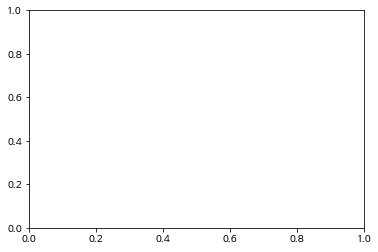

In [43]:
groups = df_ch.groupby(by = df_ch['Year'])

fig, ax = plt.subplots()
for group in groups:
  plt.plot('Date'], y = group['Close'], label = color_list)
plt.legend()
plt.show()



In [53]:
groups = df_ch.groupby(by = df_ch['Year'])


TypeError: ignored

In [42]:
 
# Data
df=pd.DataFrame({'x_values': range(1,11), 'y1_values': np.random.randn(10), 'y2_values': np.random.randn(10)+range(1,11), 'y3_values': np.random.randn(10)+range(11,21) })
 
# multiple line plots
plt.plot( 'x_values', 'y1_values', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x_values', 'y2_values', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'x_values', 'y3_values', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
# show legend
plt.legend()

# show graph
plt.show()

NameError: ignored